#### Import the required libraries

In [1]:
import spacy
import numpy as np 
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'serif'

#### List of keywords

In [3]:
job_title_keywords = [
    "aspiring human resources",
    "seeking human resources",
    "human resources professional",
    "full-stack software engineer",
    "engineering manager",
    "data scientist",
    "data analyst",
    "machine learning engineer",
    "product manager",
    "devops engineer",
    "frontend developer",
    "backend developer",
    "cloud architect",
    "business analyst",
    "UX designer",
    "AI researcher"
]

#### Choose the keywords required for a particular job

In [4]:
selected_keywords = job_title_keywords[1:3]  ### "human resources"

#### Perform lemmatization after removing common stopwords.

In [5]:
def lemmatize_and_remove_stopwords(text, nlp, stopwords):
    """
    Lemmatize the input text and remove stopwords.
    Args:
        text (str): Input text to process.
        nlp: spaCy language model.
        stopwords (set): Set of stopwords to remove.
    Returns:
        str: Lemmatized text with stopwords removed.
    """
    if pd.isnull(text):
        return None
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text.lower() not in stopwords]
    return " ".join(tokens)

#### Lemmatized keywords

In [6]:
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

lemmatized_keywords = [lemmatize_and_remove_stopwords(k, nlp, STOP_WORDS) for k in selected_keywords]
print(lemmatized_keywords)


['seek human resource', 'human resource professional']


#### Read the candidate data

In [13]:
candidate_data = pd.read_csv("potential-talents.csv")
candidate_data.head()

,id,job_title,location,connection,fit
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [14]:
candidate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    float64
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 39.1+ KB


#### Removed the duplicate data entries

In [15]:
candidate_data.drop_duplicates(subset=['job_title', 'location', 'connection'], keep='first', ignore_index=False, inplace=True)
candidate_data.head()


,id,job_title,location,connection,fit
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [16]:
candidate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 104
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          53 non-null     float64
 1   job_title   53 non-null     object 
 2   location    53 non-null     object 
 3   connection  53 non-null     object 
 4   fit         0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 2.5+ KB


In [20]:
candidate_data.drop(columns=['fit'], axis=1, inplace=True)
candidate_data.dropna(how='all', inplace=True)
candidate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 103
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          53 non-null     float64
 1   job_title   53 non-null     object 
 2   location    53 non-null     object 
 3   connection  53 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.1+ KB


In [21]:
candidate_data

,id,job_title,location,connection
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+
5,6.0,Aspiring Human Resources Specialist,Greater New York City Area,1
6,7.0,Student at Humber College and Aspiring Human R...,Kanada,61
7,8.0,HR Senior Specialist,San Francisco Bay Area,500+
9,10.0,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500+
10,11.0,Student at Chapman University,"Lake Forest, California",2


In [22]:
candidate_data['id'] = candidate_data['id'].astype('int64')

#### Lemmatize the job titles after removing stopwords and converting to lower case

In [23]:
candidate_data['job_title_lemmatized'] = candidate_data['job_title'].apply(
    lambda x: lemmatize_and_remove_stopwords(str(x).lower(), nlp, STOP_WORDS) if pd.notnull(x) else None
)

In [24]:
candidate_data.head()

,id,job_title,location,connection,job_title_lemmatized
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,2019 c.t . bauer college business graduate ( m...
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,native english teacher epik ( english program ...
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspire human resource professional
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member celal bayar university


#### Create a bar plot of the commonly occurring words in job_title feature

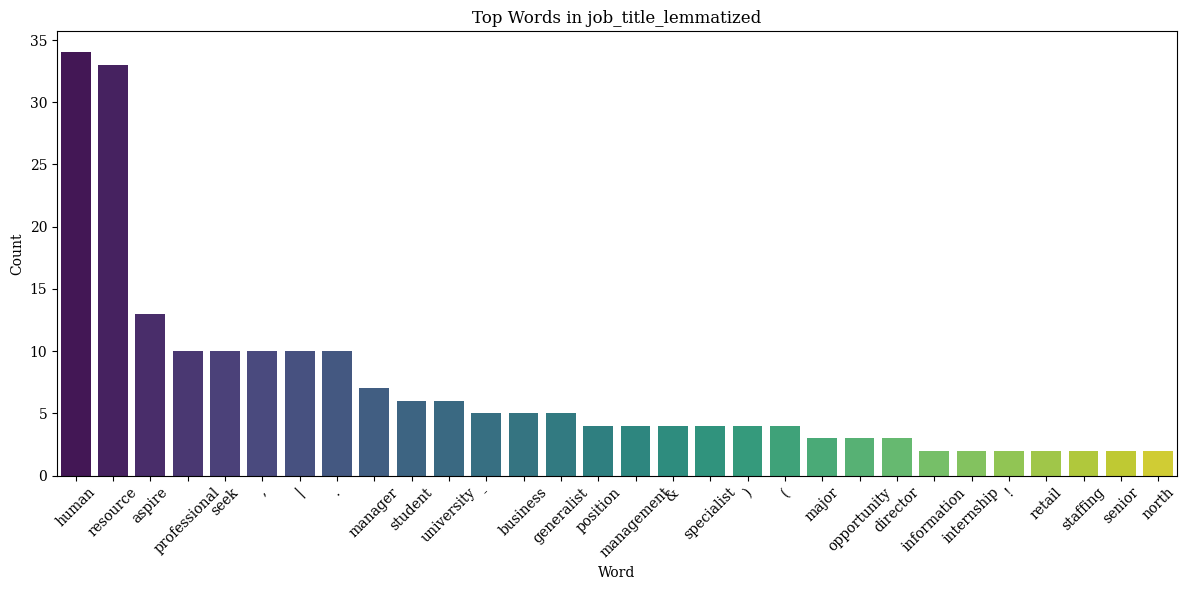

In [26]:
from collections import Counter
import seaborn as sns

# Flatten all words in job_title_lemmatized
all_words = candidate_data['job_title_lemmatized'].dropna().str.split().sum()
word_counts = Counter(all_words)

# Convert to DataFrame for plotting
word_map_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values('count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=word_map_df.head(30), x='word', y='count', palette='viridis', hue='word')
plt.title('Top Words in job_title_lemmatized')
plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [27]:
chro_entries = candidate_data[candidate_data['job_title_lemmatized'].str.contains('chro', case=False, na=False)]
chro_entries

,id,job_title,location,connection,job_title_lemmatized
11,12,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,"svp , chro , marketing & communication , csr o..."


#### Enlarge the common abbreviations of *human resources* name in the job title

In [28]:
# Mapping of HR abbreviations to their full forms
hr_abbreviation_map = {
    "chro": "chief human resource officer",
    "hr": "human resource",
    "h.r.": "human resource", 
    "hr manager": "human resource manager",
    "hr director": "human resource director",
    "h.r. professional": "human resource professional",
    "hr professional": "human resource professional"
}

def expand_hr_abbreviations(text):
    if pd.isnull(text):
        return text
    text_lower = text.lower()
    for abbr, full in hr_abbreviation_map.items():
        # Replace abbreviation with full form if found as a whole word
        text_lower = text_lower.replace(abbr, full)
    return text_lower

candidate_data['job_title_lemmatized'] = candidate_data['job_title_lemmatized'].apply(expand_hr_abbreviations)

#### Remove common symbols like '|','(',')' and '.' from the job_title_lemmatized feature

In [29]:
import re

def remove_symbols(text):
    if pd.isnull(text):
        return text
    # Remove |, (, ), and .
    return re.sub(r'[|(),.]', ' ', text)

candidate_data['job_title_lemmatized'] = candidate_data['job_title_lemmatized'].apply(remove_symbols)

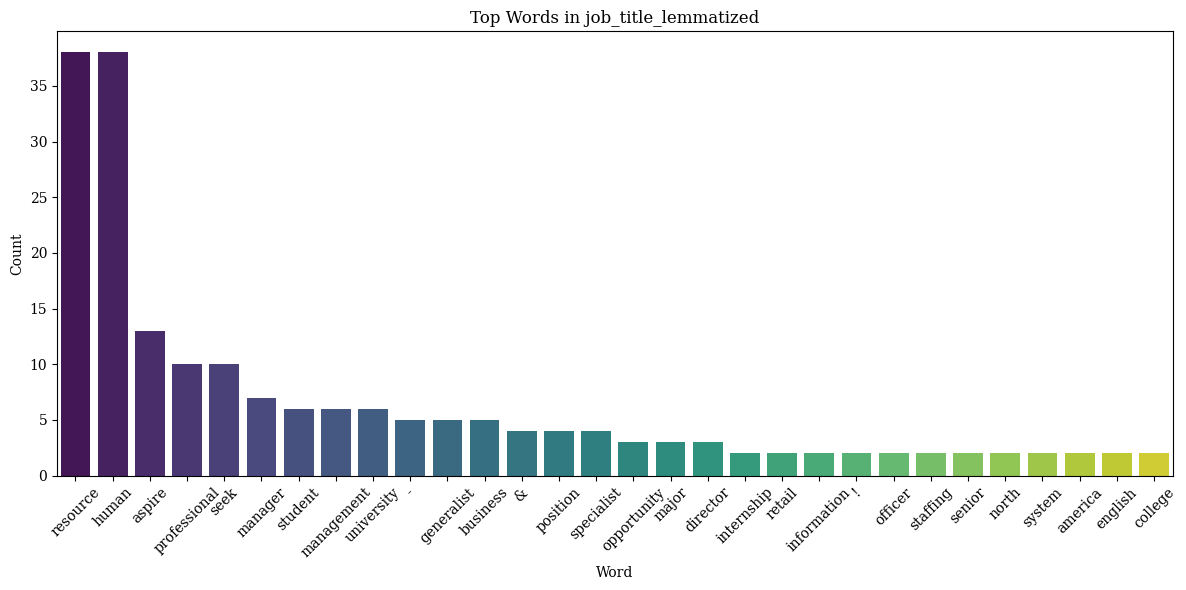

In [30]:
from collections import Counter
import seaborn as sns

# Flatten all words in job_title_lemmatized
all_words = candidate_data['job_title_lemmatized'].dropna().str.split().sum()
word_counts = Counter(all_words)

# Convert to DataFrame for plotting
word_map_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values('count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=word_map_df.head(30), x='word', y='count', palette='viridis', hue='word')
plt.title('Top Words in job_title_lemmatized')
plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

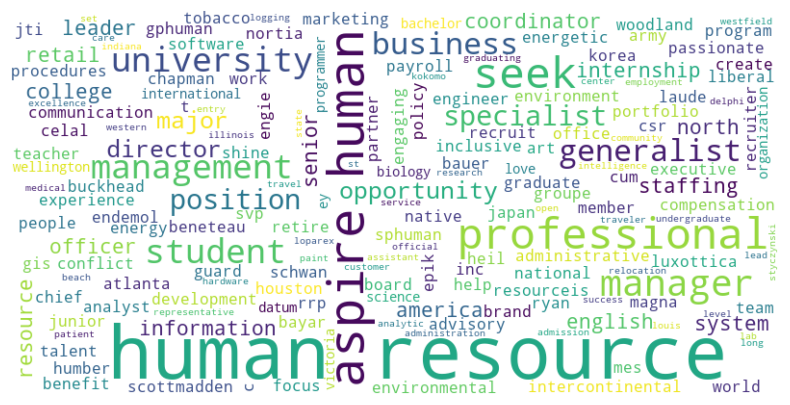

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all job titles
all_titles = ' '.join(candidate_data['job_title_lemmatized'].astype(str))

# Create word cloud
wordcloud = WordCloud(width=800, height=400, 
                     background_color='white').generate(all_titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
chro_entries = candidate_data[candidate_data['job_title_lemmatized'].str.contains('chief human resource officer', case=False, na=False)]
chro_entries

,id,job_title,location,connection,job_title_lemmatized
11,12,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,svp chief human resource officer marketing...


#### A feature containing the information if 'human resource' term is in the lemmatized job title

In [33]:
candidate_data['has_hr'] = candidate_data['job_title_lemmatized'].str.contains('human resource', case=False, na=False).astype(int)
candidate_data.head()

,id,job_title,location,connection,job_title_lemmatized,has_hr
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,2019 c t bauer college business graduate m...,1
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,native english teacher epik english program ...,0
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspire human resource professional,1
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan,0
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member celal bayar university,0


In [62]:
candidate_data

,id,job_title,location,connection,job_title_lemmatized,has_hr,word2vec_embeddings,sentence_embeddings,word2vec_max_similarity,glove_embeddings,glove_max_similarity,sentence_max_similarity,seniority_score,similarity_cluster,experience_score,country,city,region,connection_score
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,2019 c t bauer college business graduate m...,1,"[[-0.20800781, 0.034179688, 0.025756836, 0.179...","[-0.083674625, 0.034602426, -0.017335135, -0.0...",0.572644,"[[-0.61878, -0.049302, 0.35098, 0.37847, -0.21...",0.559280,0.532657,0.00,1,0.0,United States,Houston,Texas,0.170
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,native english teacher epik english program ...,0,"[[0.26367188, 0.28125, -0.05493164, -0.1630859...","[-0.020413926, 0.017400792, 0.051364556, -0.01...",0.236671,"[[-0.70018, 0.053196, -0.20213, -0.3469, -0.12...",0.409110,0.185627,0.00,1,0.0,Canada,None,Kanada,1.000
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspire human resource professional,1,"[[-0.07910156, 0.05908203, 0.16210938, 0.14257...","[-0.08615715, 0.039636217, -0.08475349, 0.0964...",0.903204,"[[0.042918, 0.90274, -0.14664, 0.12454, 0.0925...",0.927182,0.843197,0.00,2,0.0,United States,Raleigh-Durham,North Carolina Area,0.088
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan,0,"[[0.26367188, -0.019165039, 0.028930664, 0.234...","[-0.106938034, -0.012768716, -0.07286406, 0.00...",0.285902,"[[-0.41355, 0.076012, 0.099178, -0.01195, 0.01...",0.509445,0.486340,0.00,1,0.0,United States,Denton,Texas,1.000
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member celal bayar university,0,"[[-0.088378906, -0.17773438, 0.1953125, -0.072...","[-0.08322134, 0.016502693, -0.0073081846, -0.0...",0.251144,"[[0.29924, -0.056401, -0.10924, -0.16313, 0.43...",0.329143,0.282052,0.00,1,0.0,Türkiye,İzmir,None,1.000
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,aspire human resource specialist,1,"[[-0.07910156, 0.05908203, 0.16210938, 0.14257...","[-0.08820445, 0.041044395, -0.09788999, 0.1212...",0.834046,"[[0.042918, 0.90274, -0.14664, 0.12454, 0.0925...",0.841448,0.770554,0.60,2,0.0,United States,New York,Greater New York City Area,0.002
6,7,Student at Humber College and Aspiring Human R...,Kanada,61,student humber college aspire human resource g...,1,"[[0.036865234, 0.020141602, 0.22167969, 0.1552...","[-0.029845353, 0.011045597, -0.00078117166, 0....",0.761539,"[[-0.17354, -0.24319, 0.053452, -0.26109, 0.38...",0.666466,0.636068,0.00,0,0.0,Canada,None,Kanada,0.122
7,8,HR Senior Specialist,San Francisco Bay Area,500+,human resource senior specialist,1,"[[0.055908203, 0.092285156, 0.107910156, 0.283...","[-0.079811096, 0.07162694, -0.030253936, 0.031...",0.778913,"[[0.16608, 0.3167, -0.58249, -0.30978, -0.0433...",0.824274,0.802708,0.75,2,0.0,United States,San Francisco,Bay Area,1.000
9,10,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500+,seek human resource human resourceis generalis...,1,"[[-0.05517578, 0.17578125, -0.083496094, 0.002...","[-0.04490898, -0.011703302, -0.033025585, 0.00...",0.870195,"[[-0.10193, -0.34347, -0.4262, -0.04183, 0.280...",0.915967,0.767895,0.00,2,0.0,United States,Philadelphia,Greater Philadelphia Area,1.000
10,11,Student at Chapman University,"Lake Forest, California",2,student chapman university,0,"[[0.036865234, 0.020141602, 0.22167969, 0.1552...","[0.0331388, 0.0016594089, 0.016345842, 0.04849...",0.223065,"[[-0.17354, -0.24319, 0.053452, -0.26109, 0.38...",0.368430,0.238937,0.00,1,0.0,United States,Lake Forest,California,0.004


#### Create functions for creating embeddings of words using *Word2Vec*, *Sentence_Transformers* and *GloVe* models.

In [34]:
from gensim.models import Word2Vec, KeyedVectors
from sentence_transformers import SentenceTransformer
import torch


def load_pretrained_word2vec():
    # Download from: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
    # Or use Google's 300d model
    model_path = "D:/GoogleNews-vectors-negative300.bin"
    return KeyedVectors.load_word2vec_format(model_path, binary=True)

# Load once
pretrained_model = load_pretrained_word2vec()

def get_word2vec_embedding(phrase, model=pretrained_model):
    tokens = phrase.split()
    embeddings = []
    
    for word in tokens:
        if word in model:
            embeddings.append(model[word])
        # else:
        #     print(f"Warning: '{word}' not found in vocabulary")
    
    if embeddings:
        return np.array(embeddings)
    else:
        return np.array([]).reshape(0, model.vector_size)


model_name='all-MiniLM-L6-v2'
sentence_embedder = SentenceTransformer(model_name)
def get_sentence_transformer_embedding(phrase):
    embedding = sentence_embedder.encode(phrase)
    return embedding



# Load the model ONCE at module level
GLOVE_MODEL = None
vector_size = 300  # Default vector size, can be changed as needed

def load_glove_model(vector_size=300):
    global GLOVE_MODEL
    if GLOVE_MODEL is None:
        glove_path = f'D:/glove.6B.{vector_size}d.txt'
        print("Loading GloVe model... (this may take a moment)")
        GLOVE_MODEL = KeyedVectors.load_word2vec_format(glove_path, binary=False, no_header=True)
        print("GloVe model loaded successfully!")
    return GLOVE_MODEL

glove_model = load_glove_model(vector_size)

def get_glove_embedding(phrase, vector_size=300):
    tokens = phrase.split()
    embeddings = [glove_model[word] for word in tokens if word in glove_model]
    return np.array(embeddings) if embeddings else np.array([]).reshape(0, vector_size)


Loading GloVe model... (this may take a moment)
GloVe model loaded successfully!


#### Generate word2vec embeddings for lemmatized job titles

In [35]:
import pickle

# Generate Word2Vec embeddings for job_title_lemmatized
candidate_data['word2vec_embeddings'] = candidate_data['job_title_lemmatized'].apply(
    lambda x: get_word2vec_embedding(x) if pd.notnull(x) else None
)

# Save embeddings as arrays in a .pkl file (id: embedding)
embeddings_dict = dict(zip(candidate_data['id'], candidate_data['word2vec_embeddings']))
with open('word2vec_embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

In [36]:
candidate_data.head()

,id,job_title,location,connection,job_title_lemmatized,has_hr,word2vec_embeddings
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,2019 c t bauer college business graduate m...,1,"[[-0.20800781, 0.034179688, 0.025756836, 0.179..."
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,native english teacher epik english program ...,0,"[[0.26367188, 0.28125, -0.05493164, -0.1630859..."
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspire human resource professional,1,"[[-0.07910156, 0.05908203, 0.16210938, 0.14257..."
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan,0,"[[0.26367188, -0.019165039, 0.028930664, 0.234..."
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member celal bayar university,0,"[[-0.088378906, -0.17773438, 0.1953125, -0.072..."


#### Generate sentence transformer embeddings for lemmatized job titles

In [37]:
# Generate Sentence Transformer embeddings for job_title_lemmatized
candidate_data['sentence_embeddings'] = candidate_data['job_title_lemmatized'].apply(
    lambda x: get_sentence_transformer_embedding(x) if pd.notnull(x) else None
)

# Save embeddings as arrays in a .pkl file (id: embedding)
embeddings_dict = dict(zip(candidate_data['id'], candidate_data['sentence_embeddings']))
with open('sentence_embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

candidate_data.head()

,id,job_title,location,connection,job_title_lemmatized,has_hr,word2vec_embeddings,sentence_embeddings
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,2019 c t bauer college business graduate m...,1,"[[-0.20800781, 0.034179688, 0.025756836, 0.179...","[-0.083674625, 0.034602426, -0.017335135, -0.0..."
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,native english teacher epik english program ...,0,"[[0.26367188, 0.28125, -0.05493164, -0.1630859...","[-0.020413926, 0.017400792, 0.051364556, -0.01..."
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspire human resource professional,1,"[[-0.07910156, 0.05908203, 0.16210938, 0.14257...","[-0.08615715, 0.039636217, -0.08475349, 0.0964..."
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan,0,"[[0.26367188, -0.019165039, 0.028930664, 0.234...","[-0.106938034, -0.012768716, -0.07286406, 0.00..."
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member celal bayar university,0,"[[-0.088378906, -0.17773438, 0.1953125, -0.072...","[-0.08322134, 0.016502693, -0.0073081846, -0.0..."


#### Generate glove embeddings for the job_title_lemmatized feature

In [41]:
# Generate GloVe embeddings for job_title_lemmatized
candidate_data['glove_embeddings'] = candidate_data['job_title_lemmatized'].apply(
    lambda x: get_glove_embedding(x) if pd.notnull(x) else None
)

# Save embeddings as arrays in a .pkl file (id: embedding)
embeddings_dict = dict(zip(candidate_data['id'], candidate_data['glove_embeddings']))
with open('glove_embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)


candidate_data.head()

,id,job_title,location,connection,job_title_lemmatized,has_hr,word2vec_embeddings,sentence_embeddings,word2vec_max_similarity,glove_embeddings
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,2019 c t bauer college business graduate m...,1,"[[-0.20800781, 0.034179688, 0.025756836, 0.179...","[-0.083674625, 0.034602426, -0.017335135, -0.0...",0.572644,"[[-0.61878, -0.049302, 0.35098, 0.37847, -0.21..."
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,native english teacher epik english program ...,0,"[[0.26367188, 0.28125, -0.05493164, -0.1630859...","[-0.020413926, 0.017400792, 0.051364556, -0.01...",0.236671,"[[-0.70018, 0.053196, -0.20213, -0.3469, -0.12..."
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspire human resource professional,1,"[[-0.07910156, 0.05908203, 0.16210938, 0.14257...","[-0.08615715, 0.039636217, -0.08475349, 0.0964...",0.903204,"[[0.042918, 0.90274, -0.14664, 0.12454, 0.0925..."
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan,0,"[[0.26367188, -0.019165039, 0.028930664, 0.234...","[-0.106938034, -0.012768716, -0.07286406, 0.00...",0.285902,"[[-0.41355, 0.076012, 0.099178, -0.01195, 0.01..."
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member celal bayar university,0,"[[-0.088378906, -0.17773438, 0.1953125, -0.072...","[-0.08322134, 0.016502693, -0.0073081846, -0.0...",0.251144,"[[0.29924, -0.056401, -0.10924, -0.16313, 0.43..."


In [42]:
candidate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 103
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       53 non-null     int64  
 1   job_title                53 non-null     object 
 2   location                 53 non-null     object 
 3   connection               53 non-null     object 
 4   job_title_lemmatized     53 non-null     object 
 5   has_hr                   53 non-null     int32  
 6   word2vec_embeddings      53 non-null     object 
 7   sentence_embeddings      53 non-null     object 
 8   word2vec_max_similarity  53 non-null     float32
 9   glove_embeddings         53 non-null     object 
dtypes: float32(1), int32(1), int64(1), object(7)
memory usage: 4.1+ KB


#### Generate Word2Vec embeddings, GloVe emebeddings and sentence transformer embeddings for the lemmatized keywords.

In [43]:
# Generate embeddings for lemmatized_keywords
sentence_keyword_embs = [get_sentence_transformer_embedding(k) for k in lemmatized_keywords]
glove_keyword_embs = [get_glove_embedding(k, vector_size=300) for k in lemmatized_keywords]
word2vec_keyword_embs = [get_word2vec_embedding(k) for k in lemmatized_keywords]

keyword_embeddings = {
    'lemmatized_keywords': lemmatized_keywords,
    'sentence_transformer': sentence_keyword_embs,
    'glove': glove_keyword_embs,
    'word2vec': word2vec_keyword_embs
}

with open('keyword_embeddings.pkl', 'wb') as f:
    pickle.dump(keyword_embeddings, f)

#### Generate cosine similarities between the lemmatized candidate job title embeddings and the keyword embeddings

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

def max_cosine_similarity(embeddings, keyword_embs):
    """
    Compute cosine similarities between all keyword embeddings and a candidate embedding,
    and return the maximum similarity.
    """
    if embeddings is None or callable(embeddings):
        return None
    # Each candidate embedding may be a list of token vectors (Word2Vec/Glove) or a single vector (SentenceTransformer)
    # For token embeddings, average to get a single vector
    if isinstance(embeddings, list) or (isinstance(embeddings, np.ndarray) and embeddings.ndim == 2):
        if len(embeddings) == 0:
            return None
        candidate_vec = np.mean(np.array(embeddings), axis=0)
    else:
        candidate_vec = np.array(embeddings)

    max_sim = None
    for keyword_emb in keyword_embs:
        # For token embeddings, average to get a single vector
        if isinstance(keyword_emb, list) or (isinstance(keyword_emb, np.ndarray) and keyword_emb.ndim == 2):
            keyword_vec = np.mean(np.array(keyword_emb), axis=0)
        else:
            keyword_vec = np.array(keyword_emb)
        sim = cosine_similarity(
            keyword_vec.reshape(1, -1),
            candidate_vec.reshape(1, -1)
        )[0, 0]
        if (max_sim is None) or (sim > max_sim):
            max_sim = sim
    return max_sim

# Word2Vec similarities
candidate_data['word2vec_max_similarity'] = candidate_data['word2vec_embeddings'].apply(
    lambda emb: max_cosine_similarity(emb, word2vec_keyword_embs)
)

# Glove similarities
candidate_data['glove_max_similarity'] = candidate_data['glove_embeddings'].apply(
    lambda emb: max_cosine_similarity(emb, glove_keyword_embs)
)

# Sentence Transformer similarities
candidate_data['sentence_max_similarity'] = candidate_data['sentence_embeddings'].apply(
    lambda emb: max_cosine_similarity(emb, sentence_keyword_embs)
)

In [45]:
candidate_data.head()

,id,job_title,location,connection,job_title_lemmatized,has_hr,word2vec_embeddings,sentence_embeddings,word2vec_max_similarity,glove_embeddings,glove_max_similarity,sentence_max_similarity
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,2019 c t bauer college business graduate m...,1,"[[-0.20800781, 0.034179688, 0.025756836, 0.179...","[-0.083674625, 0.034602426, -0.017335135, -0.0...",0.572644,"[[-0.61878, -0.049302, 0.35098, 0.37847, -0.21...",0.559280,0.532657
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,native english teacher epik english program ...,0,"[[0.26367188, 0.28125, -0.05493164, -0.1630859...","[-0.020413926, 0.017400792, 0.051364556, -0.01...",0.236671,"[[-0.70018, 0.053196, -0.20213, -0.3469, -0.12...",0.409110,0.185627
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspire human resource professional,1,"[[-0.07910156, 0.05908203, 0.16210938, 0.14257...","[-0.08615715, 0.039636217, -0.08475349, 0.0964...",0.903204,"[[0.042918, 0.90274, -0.14664, 0.12454, 0.0925...",0.927182,0.843197
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan,0,"[[0.26367188, -0.019165039, 0.028930664, 0.234...","[-0.106938034, -0.012768716, -0.07286406, 0.00...",0.285902,"[[-0.41355, 0.076012, 0.099178, -0.01195, 0.01...",0.509445,0.486340
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member celal bayar university,0,"[[-0.088378906, -0.17773438, 0.1953125, -0.072...","[-0.08322134, 0.016502693, -0.0073081846, -0.0...",0.251144,"[[0.29924, -0.056401, -0.10924, -0.16313, 0.43...",0.329143,0.282052


#### Create plots trying to understand the different similarity scores using the different models.

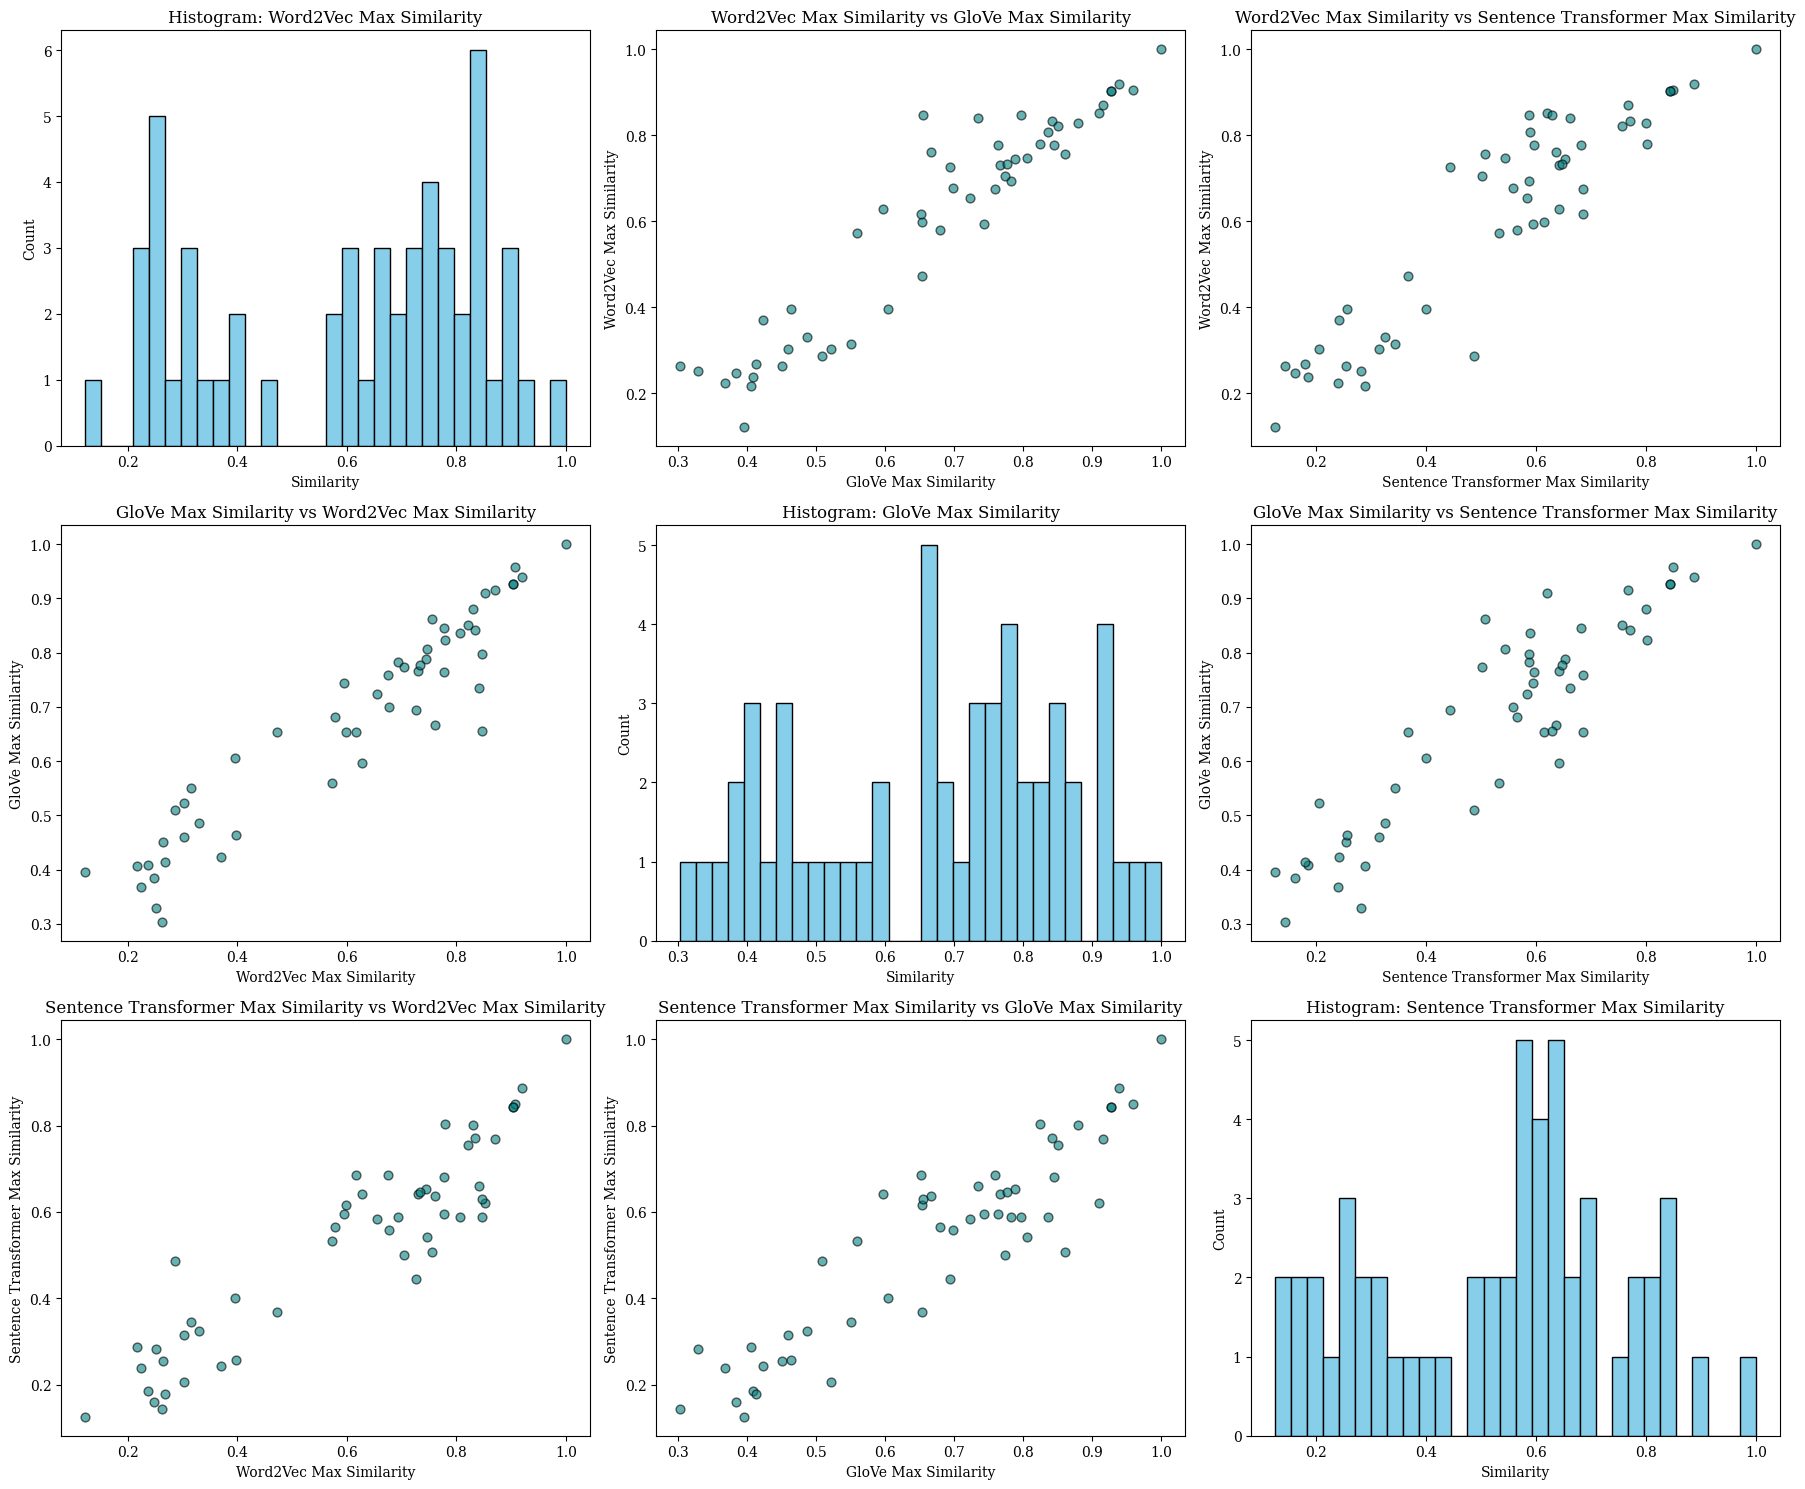

In [46]:
fig, axs = plt.subplots(3, 3, figsize=(18, 15))

similarity_cols = [
    'word2vec_max_similarity',
    'glove_max_similarity',
    'sentence_max_similarity'
]
titles = [
    'Word2Vec Max Similarity',
    'GloVe Max Similarity',
    'Sentence Transformer Max Similarity'
]

# Histogram plots
for i, col in enumerate(similarity_cols):
    axs[i, i].hist(candidate_data[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axs[i, i].set_title(f'Histogram: {titles[i]}')
    axs[i, i].set_xlabel('Similarity')
    axs[i, i].set_ylabel('Count')

# Pairwise scatter plots
for i in range(3):
    for j in range(3):
        if i != j:
            axs[i, j].scatter(
                candidate_data[similarity_cols[j]],
                candidate_data[similarity_cols[i]],
                alpha=0.6, s=40, c='teal', edgecolor='k'
            )
            axs[i, j].set_xlabel(titles[j])
            axs[i, j].set_ylabel(titles[i])
            axs[i, j].set_title(f'{titles[i]} vs {titles[j]}')

plt.tight_layout()
plt.show()

In [47]:
# For each similarity column, print job titles with lowest and highest similarity scores
for col, title in zip(similarity_cols, titles):
    lowest_idx = candidate_data[col].idxmin()
    highest_idx = candidate_data[col].idxmax()
    print(f"\n{title}:")
    print("Lowest similarity:")
    print(candidate_data.loc[lowest_idx, 'job_title'])
    print("Highest similarity:")
    print(candidate_data.loc[highest_idx, 'job_title'])


Word2Vec Max Similarity:
Lowest similarity:
Always set them up for Success
Highest similarity:
Human Resources Professional

GloVe Max Similarity:
Lowest similarity:
RRP Brand Portfolio Executive at JTI (Japan Tobacco International)
Highest similarity:
Human Resources Professional

Sentence Transformer Max Similarity:
Lowest similarity:
Always set them up for Success
Highest similarity:
Human Resources Professional


#### Add a seniority score

In [48]:
def seniority_score(job_title):
    if pd.isnull(job_title):
        return 0.0
    title = job_title
    
    # List of seniority/experience keywords, ordered from most to least senior
    seniority_keywords = [
        ('chief', 1.0), ('svp', 1.0), ('c-level', 1.0), ('executive', 0.95), ('director', 0.9),
        ('head', 0.9), ('principal', 0.85), ('lead', 0.8), ('senior', 0.75), ('sr.', 0.75),
        ('manager', 0.7), ('consultant', 0.65), ('specialist', 0.6), ('mid-level', 0.5),
        ('associate', 0.4), ('junior', 0.2), ('entry', 0.1), ('intern', 0.05), ('student', 0.0)
    ]
    for keyword, score in seniority_keywords:
        if keyword in title:
            return score
    return 0.0

candidate_data['seniority_score'] = candidate_data['job_title_lemmatized'].apply(seniority_score)

In [49]:
candidate_data.head()

,id,job_title,location,connection,job_title_lemmatized,has_hr,word2vec_embeddings,sentence_embeddings,word2vec_max_similarity,glove_embeddings,glove_max_similarity,sentence_max_similarity,seniority_score
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,2019 c t bauer college business graduate m...,1,"[[-0.20800781, 0.034179688, 0.025756836, 0.179...","[-0.083674625, 0.034602426, -0.017335135, -0.0...",0.572644,"[[-0.61878, -0.049302, 0.35098, 0.37847, -0.21...",0.559280,0.532657,0.0
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,native english teacher epik english program ...,0,"[[0.26367188, 0.28125, -0.05493164, -0.1630859...","[-0.020413926, 0.017400792, 0.051364556, -0.01...",0.236671,"[[-0.70018, 0.053196, -0.20213, -0.3469, -0.12...",0.409110,0.185627,0.0
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspire human resource professional,1,"[[-0.07910156, 0.05908203, 0.16210938, 0.14257...","[-0.08615715, 0.039636217, -0.08475349, 0.0964...",0.903204,"[[0.042918, 0.90274, -0.14664, 0.12454, 0.0925...",0.927182,0.843197,0.0
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan,0,"[[0.26367188, -0.019165039, 0.028930664, 0.234...","[-0.106938034, -0.012768716, -0.07286406, 0.00...",0.285902,"[[-0.41355, 0.076012, 0.099178, -0.01195, 0.01...",0.509445,0.486340,0.0
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member celal bayar university,0,"[[-0.088378906, -0.17773438, 0.1953125, -0.072...","[-0.08322134, 0.016502693, -0.0073081846, -0.0...",0.251144,"[[0.29924, -0.056401, -0.10924, -0.16313, 0.43...",0.329143,0.282052,0.0


#### Create similarity clusters (can be used as a feature)

In [50]:
from sklearn.cluster import KMeans

# Only use rows with valid similarity_scores
valid_candidates = candidate_data[candidate_data['glove_max_similarity'].notnull()]

# Reshape similarity_scores for KMeans
X = valid_candidates['glove_max_similarity'].values.reshape(-1, 1)

# Choose number of clusters (e.g., 3: low, medium, high similarity)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Assign cluster labels back to the original DataFrame
candidate_data.loc[valid_candidates.index, 'similarity_cluster'] = clusters

candidate_data['similarity_cluster'] = candidate_data['similarity_cluster'].astype('Int64')
candidate_data.head()

,id,job_title,location,connection,job_title_lemmatized,has_hr,word2vec_embeddings,sentence_embeddings,word2vec_max_similarity,glove_embeddings,glove_max_similarity,sentence_max_similarity,seniority_score,similarity_cluster
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,2019 c t bauer college business graduate m...,1,"[[-0.20800781, 0.034179688, 0.025756836, 0.179...","[-0.083674625, 0.034602426, -0.017335135, -0.0...",0.572644,"[[-0.61878, -0.049302, 0.35098, 0.37847, -0.21...",0.559280,0.532657,0.0,1
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,native english teacher epik english program ...,0,"[[0.26367188, 0.28125, -0.05493164, -0.1630859...","[-0.020413926, 0.017400792, 0.051364556, -0.01...",0.236671,"[[-0.70018, 0.053196, -0.20213, -0.3469, -0.12...",0.409110,0.185627,0.0,1
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspire human resource professional,1,"[[-0.07910156, 0.05908203, 0.16210938, 0.14257...","[-0.08615715, 0.039636217, -0.08475349, 0.0964...",0.903204,"[[0.042918, 0.90274, -0.14664, 0.12454, 0.0925...",0.927182,0.843197,0.0,2
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan,0,"[[0.26367188, -0.019165039, 0.028930664, 0.234...","[-0.106938034, -0.012768716, -0.07286406, 0.00...",0.285902,"[[-0.41355, 0.076012, 0.099178, -0.01195, 0.01...",0.509445,0.486340,0.0,1
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member celal bayar university,0,"[[-0.088378906, -0.17773438, 0.1953125, -0.072...","[-0.08322134, 0.016502693, -0.0073081846, -0.0...",0.251144,"[[0.29924, -0.056401, -0.10924, -0.16313, 0.43...",0.329143,0.282052,0.0,1


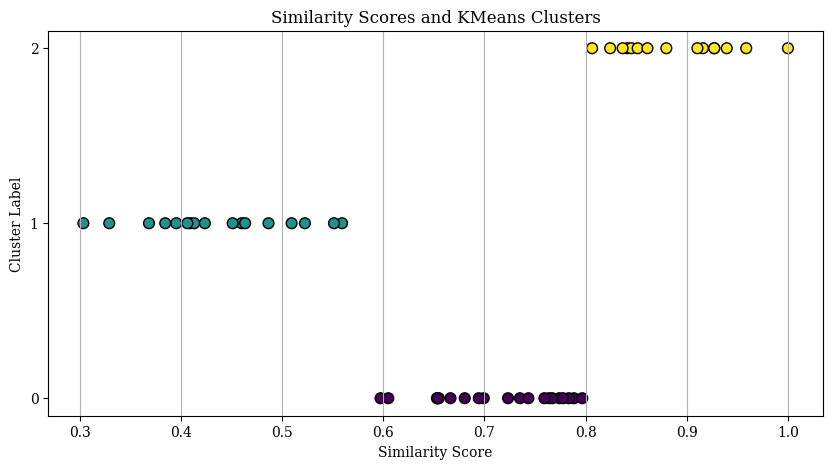

In [51]:
plt.figure(figsize=(10, 5))
plt.scatter(X.flatten(), clusters, c=clusters, cmap='viridis', s=60, edgecolor='k')
plt.xlabel('Similarity Score')
plt.ylabel('Cluster Label')
plt.title('Similarity Scores and KMeans Clusters')
plt.yticks([0, 1, 2])
plt.grid(True, axis='x')
plt.show()

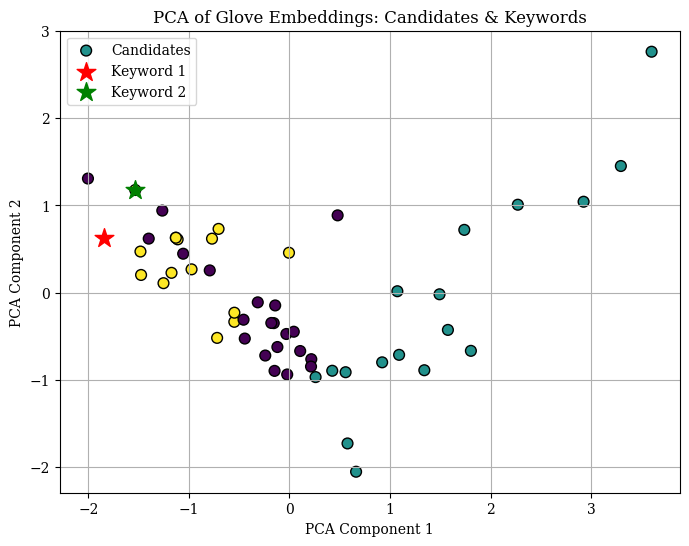

In [52]:
from sklearn.decomposition import PCA

# Prepare embeddings: keyword and all valid candidate entries
keyword_embs = np.vstack([np.mean(emb, axis=0) for emb in glove_keyword_embs if emb.size > 0])
candidate_embs = np.vstack([np.mean(emb, axis=0) for emb in valid_candidates['glove_embeddings']])
all_embs = np.vstack([keyword_embs, candidate_embs])

# Run PCA to reduce to 2D
pca = PCA(n_components=2, random_state=42)
embs_2d = pca.fit_transform(all_embs)

# Plot
plt.figure(figsize=(8, 6))
# Plot candidates, colored by cluster
scatter = plt.scatter(
    embs_2d[2:, 0], embs_2d[2:, 1],
    c=clusters, cmap='viridis', s=60, edgecolor='k', label='Candidates'
)

# Plot keywords
plt.scatter(
    embs_2d[0, 0], embs_2d[0, 1],
    c='red', marker='*', s=200, label='Keyword 1')

plt.scatter(
    embs_2d[1, 0], embs_2d[1, 1],
    c='green', marker='*', s=200, label='Keyword 2')


plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Glove Embeddings: Candidates & Keywords')
plt.legend()
plt.grid(True)
plt.show()

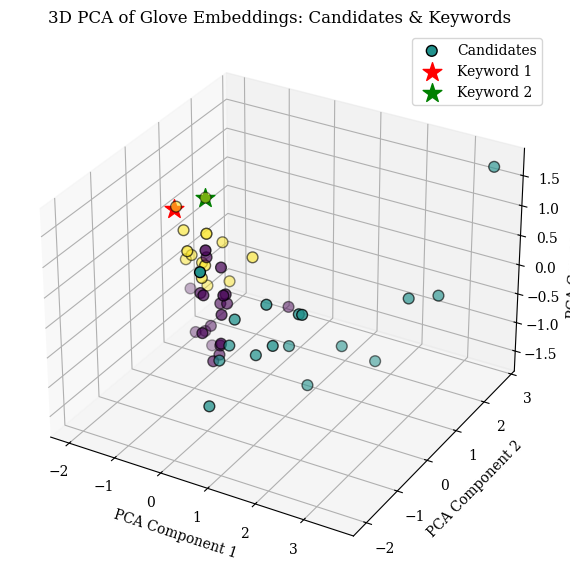

In [53]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare embeddings: keyword and all valid candidate entries
keyword_embs = np.vstack([np.mean(emb, axis=0) for emb in glove_keyword_embs if emb.size > 0])
candidate_embs = np.vstack([np.mean(emb, axis=0) for emb in valid_candidates['glove_embeddings']])
all_embs = np.vstack([keyword_embs, candidate_embs])


# Run PCA to reduce to 3D
pca_3d = PCA(n_components=3, random_state=42)
embs_3d = pca_3d.fit_transform(all_embs)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot candidates, colored by cluster
sc = ax.scatter(
    embs_3d[2:, 0], embs_3d[2:, 1], embs_3d[2:, 2],
    c=clusters, cmap='viridis', s=60, edgecolor='k', label='Candidates'
)
# Plot keyword
ax.scatter(
    embs_3d[0, 0], embs_3d[0, 1], embs_3d[0, 2],
    c='red', marker='*', s=200, label='Keyword 1'
)

ax.scatter(
    embs_3d[1, 0], embs_3d[1, 1], embs_3d[1, 2],
    c='green', marker='*', s=200, label='Keyword 2'
)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA of Glove Embeddings: Candidates & Keywords')
ax.legend()
plt.show()

#### Experience score

In [54]:
def experience_score(job_title_lemmatized):
    if pd.isnull(job_title_lemmatized):
        return 0.0
    return 1.0 if 'experience' in job_title_lemmatized.lower() else 0.0

candidate_data['experience_score'] = candidate_data['job_title_lemmatized'].apply(experience_score)

In [55]:
candidate_data.head()

,id,job_title,location,connection,job_title_lemmatized,has_hr,word2vec_embeddings,sentence_embeddings,word2vec_max_similarity,glove_embeddings,glove_max_similarity,sentence_max_similarity,seniority_score,similarity_cluster,experience_score
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,2019 c t bauer college business graduate m...,1,"[[-0.20800781, 0.034179688, 0.025756836, 0.179...","[-0.083674625, 0.034602426, -0.017335135, -0.0...",0.572644,"[[-0.61878, -0.049302, 0.35098, 0.37847, -0.21...",0.559280,0.532657,0.0,1,0.0
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,native english teacher epik english program ...,0,"[[0.26367188, 0.28125, -0.05493164, -0.1630859...","[-0.020413926, 0.017400792, 0.051364556, -0.01...",0.236671,"[[-0.70018, 0.053196, -0.20213, -0.3469, -0.12...",0.409110,0.185627,0.0,1,0.0
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspire human resource professional,1,"[[-0.07910156, 0.05908203, 0.16210938, 0.14257...","[-0.08615715, 0.039636217, -0.08475349, 0.0964...",0.903204,"[[0.042918, 0.90274, -0.14664, 0.12454, 0.0925...",0.927182,0.843197,0.0,2,0.0
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan,0,"[[0.26367188, -0.019165039, 0.028930664, 0.234...","[-0.106938034, -0.012768716, -0.07286406, 0.00...",0.285902,"[[-0.41355, 0.076012, 0.099178, -0.01195, 0.01...",0.509445,0.486340,0.0,1,0.0
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member celal bayar university,0,"[[-0.088378906, -0.17773438, 0.1953125, -0.072...","[-0.08322134, 0.016502693, -0.0073081846, -0.0...",0.251144,"[[0.29924, -0.056401, -0.10924, -0.16313, 0.43...",0.329143,0.282052,0.0,1,0.0


In [56]:
candidate_data.columns

Index(['id', 'job_title', 'location', 'connection', 'job_title_lemmatized',
       'has_hr', 'word2vec_embeddings', 'sentence_embeddings',
       'word2vec_max_similarity', 'glove_embeddings', 'glove_max_similarity',
       'sentence_max_similarity', 'seniority_score', 'similarity_cluster',
       'experience_score'],
      dtype='object')

In [57]:
import openai
from openai import OpenAI

client = openai.OpenAI(api_key="sk-proj-rCY9AX7_FXZkiwZ57f9rrkLGdZQ1AZcvMLjRRCx7g2GsTcHLo8Z-" \
"jpgGxUvT28IPHJpVLsnc3aT3BlbkFJYai_rfEHVOQG_h3jlp-HUUgfBWnGqbsYRjB5-O783bSYdK-ZJIvfuGqM6ngepsg5ceXhWZb_cA")

import json

def extract_location_parts(location):
    """
    Use OpenAI LLM to extract country and city/region from a location string.
    If the country is not present, the LLM will infer it.
    """
    if pd.isnull(location) or not str(location).strip():
        return pd.Series({'country': None, 'city_region': None})

    prompt = (
        f"Given the following location string: '{location}', "
        "extract the country, city and the region separately. "
        "If the country is not explicitly mentioned, infer it based on the city/region or context. "
        "If city is not mentioned, return None for city. "
        "Return your answer as JSON with keys 'country', 'city' and 'region'."
    )

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0
        )

        content = response.choices[0].message.content
        # Try to extract JSON from the response
        start = content.find('{')
        end = content.rfind('}') + 1
        json_str = content[start:end]
        result = json.loads(json_str)
        return pd.Series({
            'country': result.get('country', None),
            'city': result.get('city', None),
            'region': result.get('region', None)
        })
    except Exception as e:
        print(f"LLM extraction failed for '{location}': {e}")
        return pd.Series({'country': None, 'city': None, 'region': None})

# Apply to candidate_data
location_features = candidate_data['location'].apply(extract_location_parts)
candidate_data = pd.concat([candidate_data, location_features], axis=1)

In [58]:
candidate_data.head()

,id,job_title,location,connection,job_title_lemmatized,has_hr,word2vec_embeddings,sentence_embeddings,word2vec_max_similarity,glove_embeddings,glove_max_similarity,sentence_max_similarity,seniority_score,similarity_cluster,experience_score,country,city,region
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,2019 c t bauer college business graduate m...,1,"[[-0.20800781, 0.034179688, 0.025756836, 0.179...","[-0.083674625, 0.034602426, -0.017335135, -0.0...",0.572644,"[[-0.61878, -0.049302, 0.35098, 0.37847, -0.21...",0.559280,0.532657,0.0,1,0.0,United States,Houston,Texas
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,native english teacher epik english program ...,0,"[[0.26367188, 0.28125, -0.05493164, -0.1630859...","[-0.020413926, 0.017400792, 0.051364556, -0.01...",0.236671,"[[-0.70018, 0.053196, -0.20213, -0.3469, -0.12...",0.409110,0.185627,0.0,1,0.0,Canada,None,Kanada
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspire human resource professional,1,"[[-0.07910156, 0.05908203, 0.16210938, 0.14257...","[-0.08615715, 0.039636217, -0.08475349, 0.0964...",0.903204,"[[0.042918, 0.90274, -0.14664, 0.12454, 0.0925...",0.927182,0.843197,0.0,2,0.0,United States,Raleigh-Durham,North Carolina Area
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan,0,"[[0.26367188, -0.019165039, 0.028930664, 0.234...","[-0.106938034, -0.012768716, -0.07286406, 0.00...",0.285902,"[[-0.41355, 0.076012, 0.099178, -0.01195, 0.01...",0.509445,0.486340,0.0,1,0.0,United States,Denton,Texas
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member celal bayar university,0,"[[-0.088378906, -0.17773438, 0.1953125, -0.072...","[-0.08322134, 0.016502693, -0.0073081846, -0.0...",0.251144,"[[0.29924, -0.056401, -0.10924, -0.16313, 0.43...",0.329143,0.282052,0.0,1,0.0,Türkiye,İzmir,None


#### A connection score is added

In [59]:
def connection_score(connection):
    """
    Score connection count between 0 and 1, linearly from 0 to 500+.
    Accepts values like '85', '500+', etc.
    """
    if pd.isnull(connection):
        return 0.0
    try:
        # Handle '500+' and similar
        if isinstance(connection, str) and '500' in connection:
            return 1.0
        # Try to extract numeric value
        num = int(''.join(filter(str.isdigit, str(connection))))
        score = min(num, 500) / 500.0
        return score
    except Exception:
        return 0.0

candidate_data['connection_score'] = candidate_data['connection'].apply(connection_score)

In [60]:
candidate_data['id'] = candidate_data['id'].astype('Int64')

In [61]:
candidate_data.to_csv('extracted_features_candidate_data_ver3.csv', index=False)